In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing

In [31]:
data = pd.DataFrame(housing.data)
data = data.iloc[:, :9]  # Select only the first 8 columns
data.columns = housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
data['PRICE'] = housing.target
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [16]:
x = data.drop(['PRICE'], axis =1 )
y = data['PRICE']
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest =train_test_split(x,y, test_size =0.2 ,random_state =0)

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)

ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error (Test Data): {mse_test}")


mse_train = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error (Train Data): {mse_train}")


mse_test_again = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error (Test Data Again): {mse_test_again}")

Mean Squared Error (Test Data): 0.5289841670367214
Mean Squared Error (Train Data): 0.5234413607125448
Mean Squared Error (Test Data Again): 0.5289841670367214


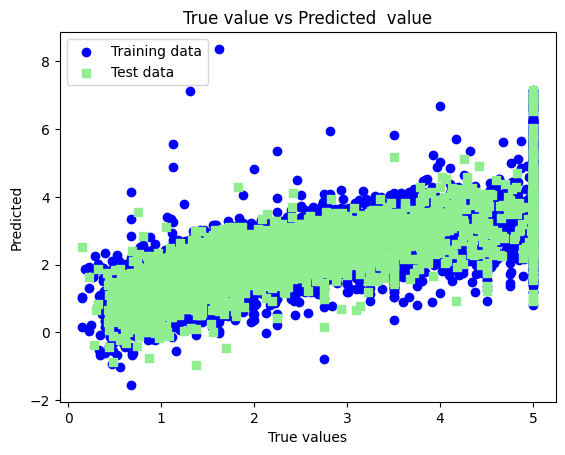

In [22]:
plt.scatter(ytrain , ytrain_pred,c='blue' ,marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen' ,marker='s' ,label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted  value")
plt.legend(loc= 'upper left')
plt.plot ()
plt.show ()

In [24]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

model = np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [26]:
predict = np.poly1d(model)
predict(65)


np.float64(68.63013698630135)

In [27]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

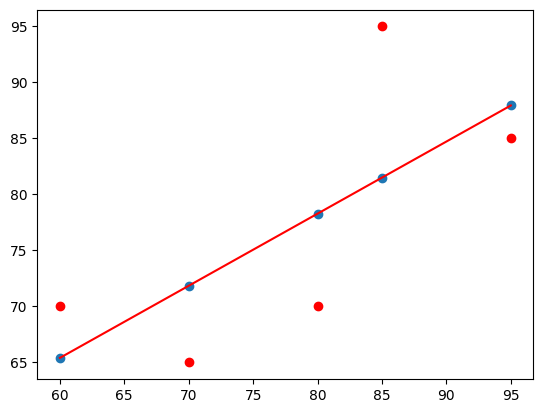

In [28]:
y_line = model[1] + model[0]* x
plt.plot(x,y_line, c= 'r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')